<a href="https://colab.research.google.com/github/corinaccqf/unsupervised-learning/blob/main/Dimensionality_Reduction_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.4-py3-none-any.whl size=86770 sha256=b4fd8cca85e1377a6011f5f093f0b956ebbb8aca24c5ed9275bdb512df56e70a
  Stored in directory: /root/.cache/pip/wheels/fb/66/29/199acf5784d0f7b8add6d466175ab45506c96e386ed5dd0633
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55615 sha256=257b339117bf761584d234af8ee4a33306c33903d03df36bd3d56d7fc5449c7e
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


Asignación
En esta tarea, trabajará con el  conjunto de datos MNIST de moda . Este es otro conjunto de datos de imágenes que comprende 70.000 imágenes en escala de grises de 28x28. El conjunto de datos contiene las siguientes 10 clases:



*   camiseta/top
*   Pantalón/pantalones
*   Camisa tipo jersey
*   Vestido
*   Abrigo
*   Sandalia
*   Camisa
*   Zapatilla
*   Bolsa
*   Botín

Puede cargar el conjunto de datos utilizando la   siguiente fetch_openml función  :sklearn.datasets

mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)
O, alternativamente, puedes descargarlo desde  este enlace  y cargarlo tú mismo.

Seleccione aleatoriamente 10.000 imágenes y trabaje en esta muestra en los siguientes ejercicios.

Para completar esta tarea, envíe un enlace a un Jupyter Notebook que contenga sus soluciones para las tareas que se describen a continuación:





1.   Cargue el conjunto de datos y realice cualquier preprocesamiento necesario, como normalizar los datos.
2.   Aplique PCA a los datos y obtenga los dos primeros componentes principales.
3.   Utilizando los dos primeros componentes principales, dibuja una gráfica de los datos coloreando y etiquetando los puntos de datos como lo hiciste en el punto de control.
4.   ¿Cree que la solución PCA es satisfactoria? ¿Puedes distinguir fácilmente entre las diferentes clases?

5.   Aplique t-SNE a los datos configurando  n_components=2.

6.   Usando la representación t-SNE bidimensional, dibuja una gráfica de los datos coloreando y etiquetando los puntos de datos como lo hiciste en el punto de control.

7.   ¿Cree que la solución t-SNE es satisfactoria? ¿Puedes distinguir fácilmente entre las diferentes clases? ¿Qué algoritmo produjo mejores resultados, t-SNE o el PCA que aplicó en la asignación del punto de control anterior?

8.   Ahora juega con los diferentes  perplexity valores y aplica t-SNE para cada uno de ellos. ¿Qué valor de perplejidad es mejor en términos de claridad de representación bidimensional?
9.   Aplique UMAP a los datos.
10.  Utilizando la representación UMAP bidimensional, dibuje una gráfica de los datos coloreando y etiquetando los puntos de datos como lo hizo en el punto de control.
11.  ¿Crees que la solución UMAP es satisfactoria? ¿Puedes distinguir fácilmente entre las diferentes clases? ¿Qué algoritmo produjo mejores resultados, UMAP o los demás (t-SNE o PCA) que aplicó en las asignaciones de los puntos de control anteriores?

12.   Ahora, juegue con los diferentes valores de hiperparámetros de UMAP y aplique UMAP para cada uno de ellos. ¿Qué combinación es la mejor en términos de claridad de representación bidimensional?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap


1.   Cargue el conjunto de datos y realice cualquier preprocesamiento necesario, como normalizar los datos.




Puede cargar el conjunto de datos utilizando la   siguiente fetch_openml función  :sklearn.datasets

mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [4]:
# Cargar el conjunto de datos Fashion MNIST
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


2.    Aplique PCA a los datos y obtenga los dos primeros componentes principales.

In [19]:
np.random.seed(42)
indices = np.random.choice(70000, 10000, replace=False)
sample_images = mnist.data.iloc[indices]
sample_labels = mnist.target.iloc[indices]

pca = PCA(n_components=2)
pca_result = pca.fit_transform(sample_images)
sample_images = sample_images / 255.0

Utilizando los dos primeros componentes principales, dibuja una gráfica de los datos coloreando y etiquetando los puntos de datos como lo hiciste en el punto de control.

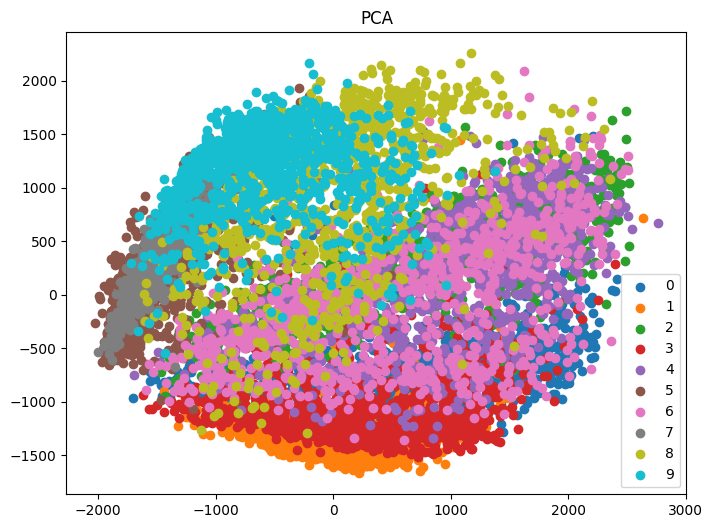

In [20]:
# Visualizar con PCA
plt.figure(figsize=(8, 6))
for label in np.unique(sample_labels):
    plt.scatter(pca_result[sample_labels == label, 0],
                pca_result[sample_labels == label, 1],
                label=label)
plt.title('PCA')
plt.legend()
plt.show()

la verdad que no se distinguen muy bien las clases, se observa diferentes colores de una manera esparcida

Aplique t-SNE a los datos configurando  n_components=2.

In [21]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(sample_images)

Usando la representación t-SNE bidimensional, dibuja una gráfica de los datos coloreando y etiquetando los puntos de datos como lo hiciste en el punto de control.

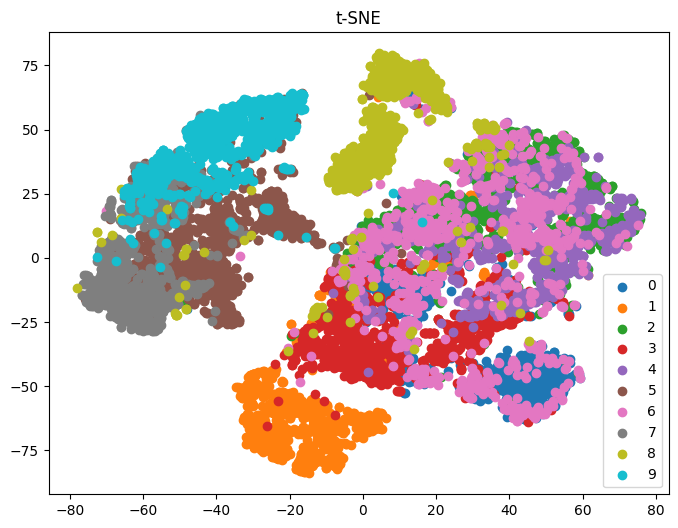

In [11]:
# Visualizar con t-SNE
plt.figure(figsize=(8, 6))
for label in np.unique(sample_labels):
    plt.scatter(tsne_result[sample_labels == label, 0],
                tsne_result[sample_labels == label, 1],
                label=label)
plt.title('t-SNE')
plt.legend()
plt.show()

Aplique UMAP a los datos.
Utilizando la representación UMAP bidimensional, dibuje una gráfica de los datos coloreando y etiquetando los puntos de datos como lo hizo en el punto de control.

In [22]:
umap_model = umap.UMAP()
umap_result = umap_model.fit_transform(sample_images)

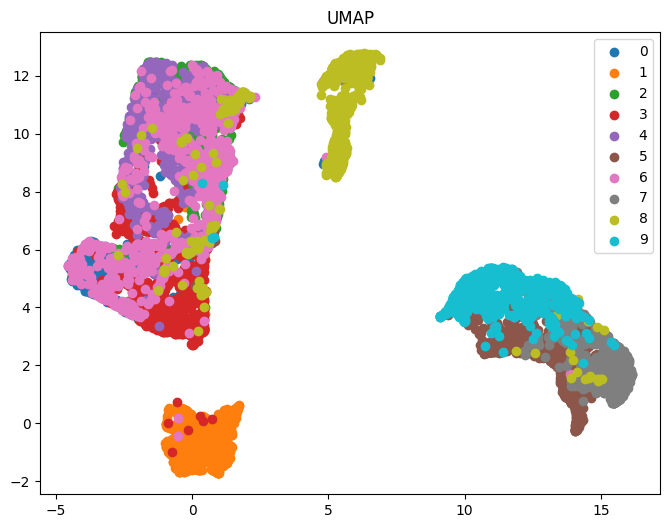

In [23]:
plt.figure(figsize=(8, 6))
for label in np.unique(sample_labels):
    plt.scatter(umap_result[sample_labels == label, 0],
                umap_result[sample_labels == label, 1],
                label=label)
plt.title('UMAP')
plt.legend()
plt.show()

Como se puede observar en los diferentes graficos, en el metodo UMAP tiende a distiguirse mejor las clases a comparación de PCA y t-SNE